In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen
import json

In [76]:
pas = pd.read_csv("https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/Rekrutacja_2023/main/spaceship_titanic/dane.csv")

In [79]:
pas.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
643,0674_01,Earth,True,G/101/S,PSO J318.5-22,46.0,False,0.0,0.0,0.0,0.0,0.0,Grette Dillips,False
6004,6356_01,NaN,False,F/1316/P,TRAPPIST-1e,44.0,False,0.0,0.0,0.0,729.0,397.0,Almara Currisones,True
715,0756_01,Europa,True,B/27/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Ashelik Ainserfle,True
5302,5661_02,Earth,True,G/905/P,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Vane Ellahan,False
1420,1500_05,Earth,False,F/288/S,55 Cancri e,17.0,False,319.0,184.0,0.0,0.0,376.0,Irmark Barbes,False


In [24]:
pas.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [28]:
pas.shape

(8693, 14)

In [85]:
pas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [105]:
pas.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [120]:
pas[pas.isna().any(axis = 1)].sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Gender
3776,4032_01,Earth,NaN,G/661/P,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Deaney Waltonnedy,True,NaN
1261,1335_01,Earth,True,G/199/P,TRAPPIST-1e,44.0,False,0.0,0.0,0.0,0.0,0.0,Shan Moodsey,False,NaN
6067,6413_01,Europa,False,A/77/S,TRAPPIST-1e,65.0,NaN,0.0,1420.0,NaN,85.0,827.0,Grasath Undrude,False,NaN
3128,3377_01,Mars,True,F/638/S,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,Ran Merie,True,NaN
5985,6334_07,Earth,False,G/1028/S,55 Cancri e,2.0,False,0.0,0.0,0.0,0.0,0.0,Gailia Jenson,True,NaN


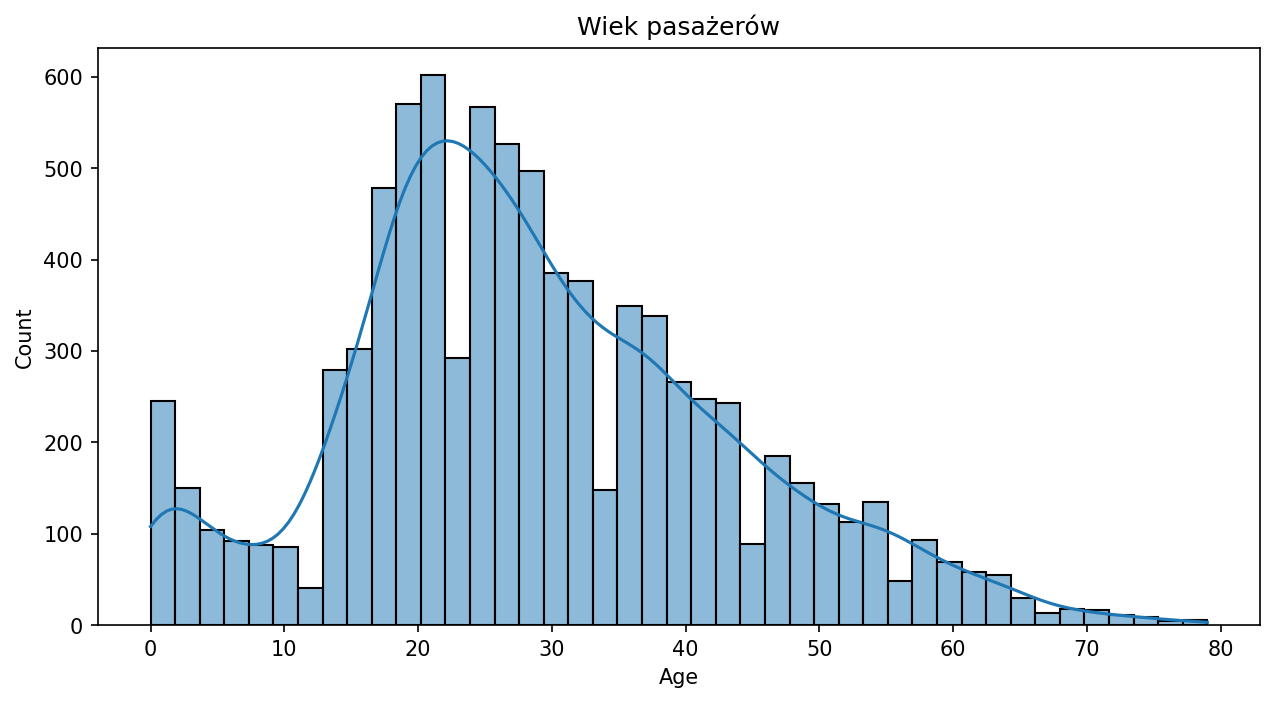

In [103]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data = pas, x = "Age", kde=True)
plt.title("Wiek pasażerów")

plt.show()

In [121]:
pas['Transported'].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

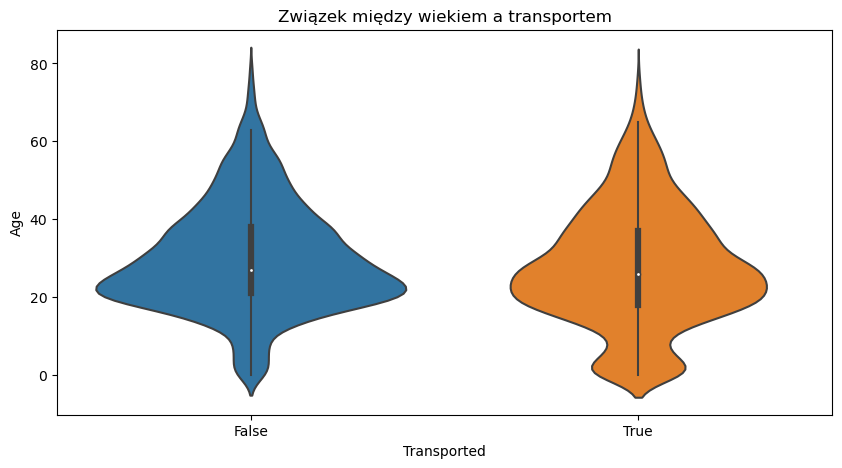

In [135]:
plt.figure(figsize=(10, 5), dpi=100)
sns.violinplot(data = pas, x = 'Transported',  y = "Age")
plt.title("Związek między wiekiem a transportem")


plt.show()

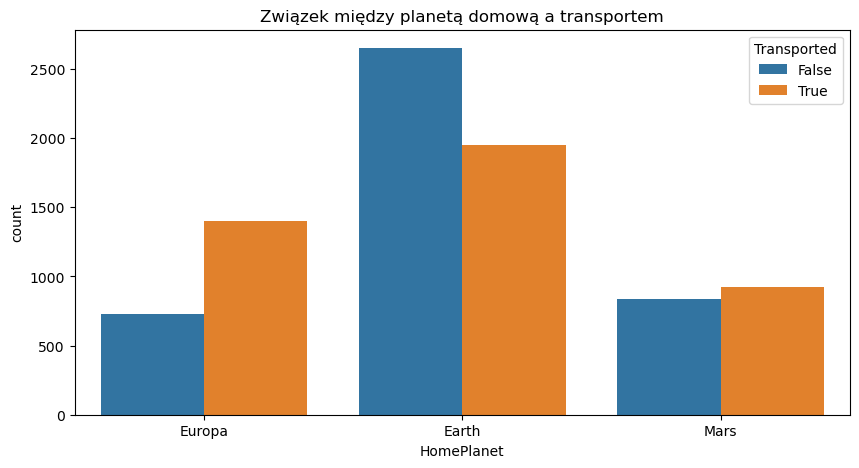

In [113]:
plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=pas, x="HomePlanet", hue="Transported")
plt.title("Związek między planetą domową a transportem")

plt.show()

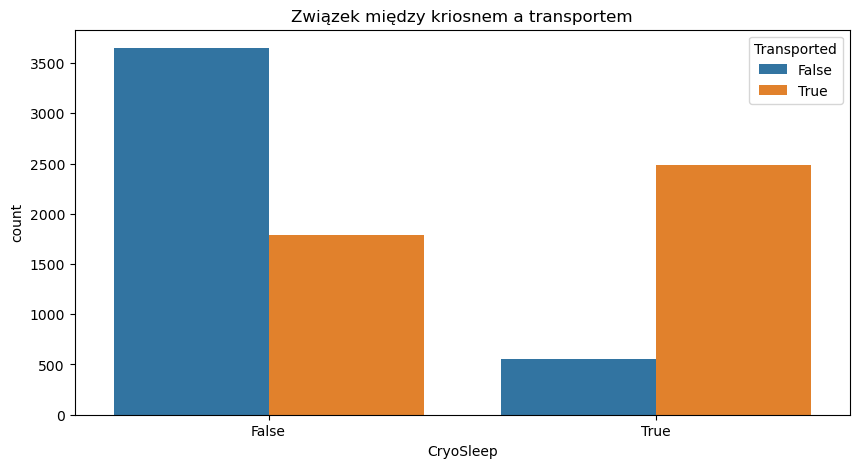

In [114]:
plt.figure(figsize=(10,5), dpi = 100)
sns.countplot(data=pas, x="CryoSleep", hue="Transported")
plt.title("Związek między kriosnem a transportem")

plt.show()

In [130]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
service_table = pd.melt(pas, ['PassengerId', 'Transported'], services, 'Service', 'Value')

In [131]:
service_table[service_table['Value'] > 0].groupby(['Service', 'Transported'])['Transported'].size()/service_table[service_table['Value'] > 0]['Service'].value_counts()

Service       Transported
FoodCourt     False          0.654551
              True           0.345449
RoomService   False          0.740034
              True           0.259966
ShoppingMall  False          0.682885
              True           0.317115
Spa           False          0.722536
              True           0.277464
VRDeck        False          0.724585
              True           0.275415
dtype: float64

Osoby, które wykupiły usługi na pokładzie, miały stosunkowo większe szanse na to, że nie zostaną przewiezione, szczególnie w przypadku usług pokojowych, spa i pokładu VR (73% nie przewiezionych pasażerów).


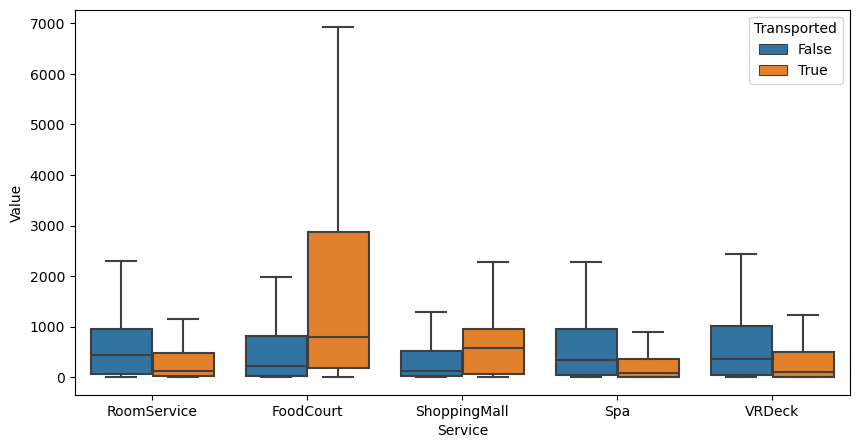

In [134]:
plt.figure(figsize = (10,5), dpi = 100)
sns.boxplot(data = service_table[service_table['Value'] > 0], x = 'Service', y = 'Value', hue = 'Transported', showfliers = False)
print('Osoby, które wykupiły usługi na pokładzie, miały stosunkowo większe szanse na to, że nie zostaną przewiezione, szczególnie w przypadku usług pokojowych, spa i pokładu VR (73% nie przewiezionych pasażerów).')

plt.show()

In [154]:
# vip_true = pas[pas['VIP']==True]
# vip_false = pas[pas['VIP']==False]

In [163]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), dpi=100)
# sns.scatterplot(data=vip_true, x="VIP", y='Transported', ax=ax1)
# # sns.countplot(data = pas, x = 'VIP',  hue ="Transported")
# # plt.title("Związek między wiekiem a transportem")


# plt.show()

In [142]:
# j = 0
# url = "https://api.genderize.io/?name="
# for name in pas['Name']:
#     if type(name) != str:
#         break
#     new_name = name.lower().split()[0]
#     new_url = url+new_name
#     result = urlopen(url).read().decode('utf-8')
#     getGender = json.loads(result)
#     pas.loc[j, 'Gender'] = getGender['gender']
#     j +=1

In [ ]:
# women = pas.loc[pas[Gender] == 'female']["Survived"]
# rate_women = sum(women)/len(women)